<a href="https://colab.research.google.com/github/Chandusatyasai/TECHNEST/blob/TECHNEST/STYLETRANSFERDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

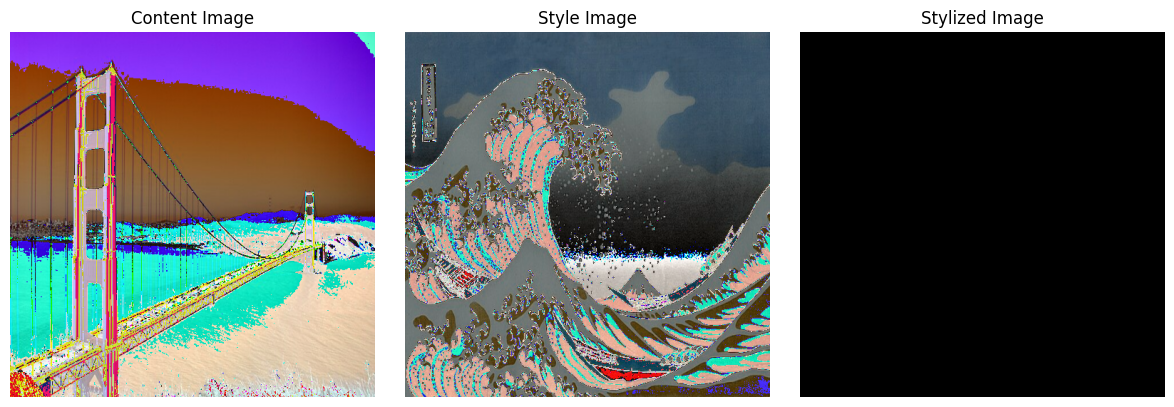

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load pre-trained model
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

# Image loading and preprocessing
def load_and_process_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, (512, 512))
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return tf.expand_dims(img, axis=0)

# Deprocess and show image
def deprocess_img(processed_img):
    x = processed_img.copy()
    x = x.reshape((512, 512, 3))
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]
    return np.clip(x, 0, 255).astype('uint8')

# Use tf.keras.preprocessing.image to load content and style images
content_image = load_and_process_img("content_image.jpg")
style_image = load_and_process_img("style_image.jpg")

# Neural Style Transfer (via tf-hub or custom loss-based optimization)
# You can also use tf.keras.applications.vgg19 layers for custom style/content loss

# For simplicity, use tensorflow_hub pretrained NST module:
import tensorflow_hub as hub

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Display
plt.figure(figsize=(12, 4))
titles = ['Content Image', 'Style Image', 'Stylized Image']
for i, img in enumerate([content_image, style_image, stylized_image]):
    plt.subplot(1, 3, i+1)
    plt.imshow(tf.squeeze(img).numpy().astype("uint8"))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Download example images
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg -O content_image.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/The_Great_Wave_off_Kanagawa.jpg/640px-The_Great_Wave_off_Kanagawa.jpg -O style_image.jpg

--2025-06-08 03:35:38--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71918 (70K) [image/jpeg]
Saving to: ‘content_image.jpg’

content_image.jpg   100%[===================>]  70.23K  --.-KB/s    in 0.03s   

2025-06-08 03:35:38 (2.62 MB/s) - ‘content_image.jpg’ saved [71918/71918]

--2025-06-08 03:35:38--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/The_Great_Wave_off_Kanagawa.jpg/640px-The_Great_Wave_off_Kanagawa.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting re